In [1]:
# import functions needed for GBM model
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV   #Performing grid search
import matplotlib.pyplot as plt


/Users/arthur/Library/Python/3.6/lib/python/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/arthur/Library/Python/3.6/lib/python/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
companies = ['AAPL', 'MSFT', 'AMZN', 'INTC', 'TSLA']
# all_data = dict.fromkeys(companies, pd.DataFrame())

#first two dataframes are the X_train and y_train
main_data = dict.fromkeys(companies, pd.DataFrame)
X_split_data = dict.fromkeys(companies, pd.DataFrame)
X_train_data = dict.fromkeys(companies, pd.DataFrame)
y_train_data = dict.fromkeys(companies, [])
X_test_data = dict.fromkeys(companies, pd.DataFrame)
y_test_data = dict.fromkeys(companies, [])

In [3]:
split_percentage = 0.8
def init_data(companies):
#     pd.DataFrame(),pd.DataFrame(), pd.DataFrame(),[],pd.DataFrame(),
    for comp in companies:
        main_data[comp] = pd.read_csv(f'./rsc/{comp}_data.csv', sep = ',')
        main_data[comp].dropna()
        y = np.where(main_data[comp]['close'].shift(-1) > main_data[comp]['close'],1,-1)
        main_data[comp]['Open-Close'] = main_data[comp].open - main_data[comp].close
        main_data[comp]['High-Low'] = main_data[comp].high - main_data[comp].low
        X = main_data[comp][main_data[comp].columns[1:]]
        split = int(split_percentage*len(main_data[comp]['date']))
        X_split_data[comp] = main_data[comp][split:]
        X_train_data[comp] = X[:split]
        y_train_data[comp] = y[:split]
        X_test_data[comp] = X[split:]
        y_test_data[comp] = y[split:]
        
init_data(companies)

In [4]:
# optimum parameters found from ML_Model_Training
parameter_dict = {
    'max_depth': 7,
    'min_samples_split': 420,
    'min_samples_leaf': 30,
    'subsample': 0.8,
    'random_state': 10,
    'max_features': 11
}
predictors = X_train_data['AAPL'].columns

In [5]:
print(predictors)

Index(['20_day_sma', 'close', 'ewma_12', 'ewma_26', 'high', 'low', 'obv_10',
       'open', 'rsi_14', 'volume', 'Open-Close', 'High-Low'],
      dtype='object')


In [6]:
# first two dataframes are the X_train and y_train
# second two dataframes are the X_test and y_test
def model_fit(alg, X_data, X_train, y_train, X_test, y_test, predictors, companies, performCV=True, printFeatureImportance=True, cv_folds=5):
    for comp in companies:
        # model_fit(gbm0, all_data[comp][0], predictors, all_data[comp][1], company_name = comp)
        # Fit algorithm on the data
        alg.fit(X_train[comp], y_train[comp])

        # compare accuracy by comparing actual values of trading signal with predicted values of trading signal
        accuracy_train = accuracy_score(y_train[comp], gbm0.predict(X_train[comp]))
        accuracy_test = accuracy_score(y_test[comp], gbm0.predict(X_test[comp]))
        print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
        print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))
        
        # Predict testing set
        X_train_predictions = alg.predict(X_test[comp])
        X_train_predprob = alg.predict_proba(X_test[comp])[:,1]

        graph_data(alg, X_data[comp], X_test[comp], y_test[comp], comp)


In [7]:
def graph_data(alg, X_data, X_test, y_test, comp):
    if X_data.index.name != "date":
        X_data.set_index('date', inplace=True)
    
    X_data.loc[:,'Predicted_Signal'] = alg.predict(X_test)
    X_data.loc[:,'Return'] = y_test
    X_data.loc[:,'Strategy_Return'] = X_data.loc[:,'Return'] * X_data.loc[:,'Predicted_Signal']
    X_data.loc[:,'Strategy_Return'].cumsum().plot(figsize=(10,4))
    plt.ylabel(f"\n{comp} Strategy Returns (%)")
    plt.show()
    


Train Accuracy: 74.48%
Test Accuracy: 59.72%


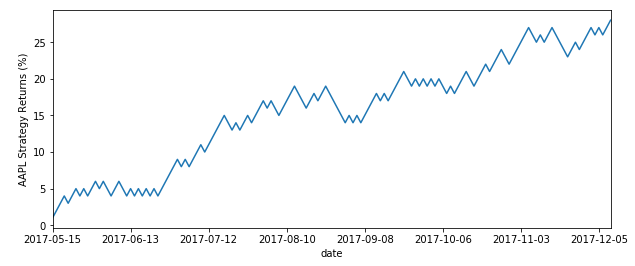


Train Accuracy: 69.10%
Test Accuracy: 69.66%


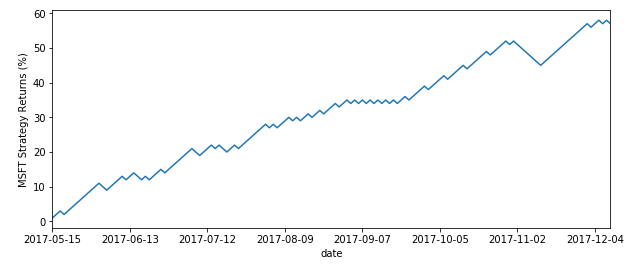


Train Accuracy: 65.97%
Test Accuracy: 55.56%


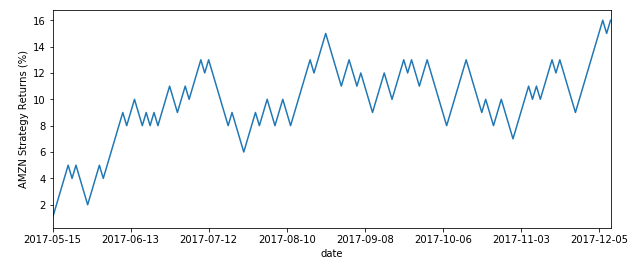


Train Accuracy: 69.44%
Test Accuracy: 65.28%


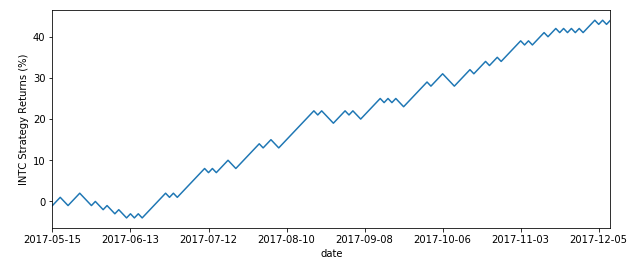


Train Accuracy: 67.01%
Test Accuracy: 60.69%


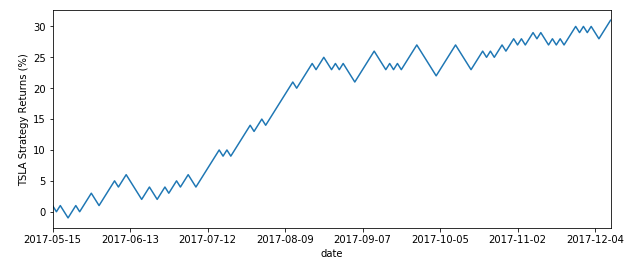

In [8]:
gbm0 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_depth=parameter_dict['max_depth'], min_samples_split=parameter_dict['min_samples_split'], min_samples_leaf= parameter_dict['min_samples_leaf'], subsample=parameter_dict['subsample'], random_state=parameter_dict['random_state'], max_features=parameter_dict['max_features'])

# Choose predictors test model accuracy
# hide pandas warnings
import warnings
warnings.filterwarnings('ignore')
model_fit(alg = gbm0, X_data = X_split_data, X_train = X_train_data, y_train = y_train_data, X_test = X_test_data, y_test = y_test_data, predictors = predictors, companies = companies )
    

In [9]:
X_split_data['AAPL'].head()

,20_day_sma,close,ewma_12,ewma_26,high,low,obv_10,open,rsi_14,volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return
date,,,,,,,,,,,,,,,
2017-05-15,147.42454,155.70,151.290147,147.763880,156.65,155.05,2919283.3,156.01,44.40,25700983.0,0.31,1.60,-1,-1,1
2017-05-16,148.13804,155.47,151.933202,148.334704,156.06,154.72,2485282.1,155.94,46.83,19904679.0,0.47,1.34,-1,-1,1
2017-05-17,148.61654,150.25,151.674247,148.476577,154.57,149.71,8128817.5,153.60,71.69,49482818.0,3.35,4.86,1,1,1
2017-05-18,149.12154,152.54,151.807440,148.777572,153.34,151.13,8123461.4,151.27,62.39,33159664.0,-1.27,2.21,1,1,1
2017-05-19,149.65604,152.96,151.984757,149.087381,153.98,152.63,5523547.3,153.38,37.14,26733798.0,0.42,1.35,-1,1,-1
